In [1]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

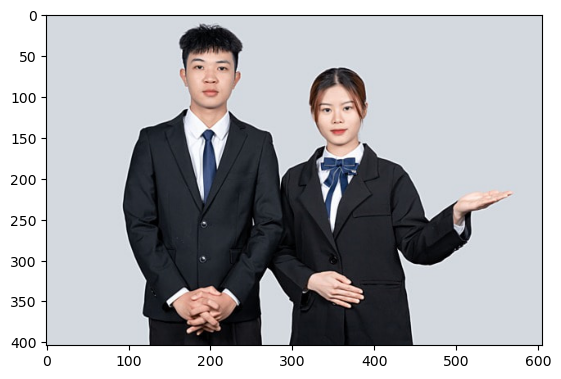

In [2]:
# Read the image
image = cv2.imread('two_people.jpg')

# Convert to RGB color space if needed
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.show()

In [6]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Read the image
image = cv2.imread('two_people.jpg')

# Convert to RGB color space
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to reduce computational load
scale_percent = 25  # Scale down by 25%
width = int(image_rgb.shape[1] * scale_percent / 100)
height = int(image_rgb.shape[0] * scale_percent / 100)
dim = (width, height)
image_rgb = cv2.resize(image_rgb, dim, interpolation=cv2.INTER_AREA)

# Flatten the image for DBSCAN
pixels = image_rgb.reshape((-1, 3))

# Standardize the color features
scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels)

# Apply gmm
# Adjust these parameters based on your image and desired effect


gmm = GaussianMixture(n_components=2, random_state=0)
clusters = gmm.fit_predict(normalized_pixels)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

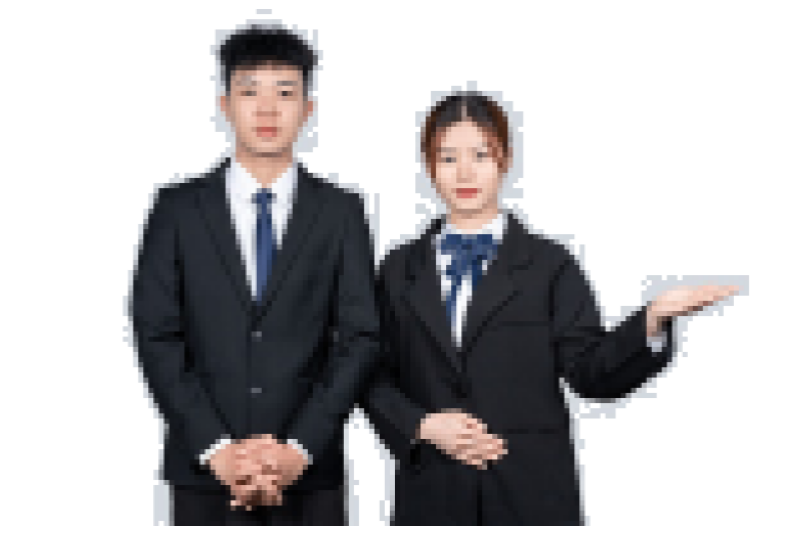

In [7]:
# Creating a mask for distinguishing background and foreground
mask = clusters == 0
# ... [previous code for GMM clustering] ...

# Reshaping mask to the size of the image used in GMM
mask_image = mask.reshape(image_rgb.shape[0], image_rgb.shape[1])

# Fill the background with white color
segmented_image = np.zeros_like(image_rgb)
segmented_image[mask_image] = 255  # White background
segmented_image[~mask_image] = image_rgb[~mask_image]  # Keep the foreground

# Convert the segmented image back to BGR for correct display with OpenCV
segmented_image_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)

# Resize the segmented image to original dimensions
original_height, original_width = image.shape[:2]
segmented_image_resized = cv2.resize(segmented_image_bgr, (original_width, original_height), interpolation=cv2.INTER_AREA)

# Set the size for display
plt.figure(figsize=(10, 10))  # Image width-to-height ratio

# Display the image
plt.imshow(cv2.cvtColor(segmented_image_resized, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying with matplotlib
plt.axis('off')  # Turn off the axis
plt.show()

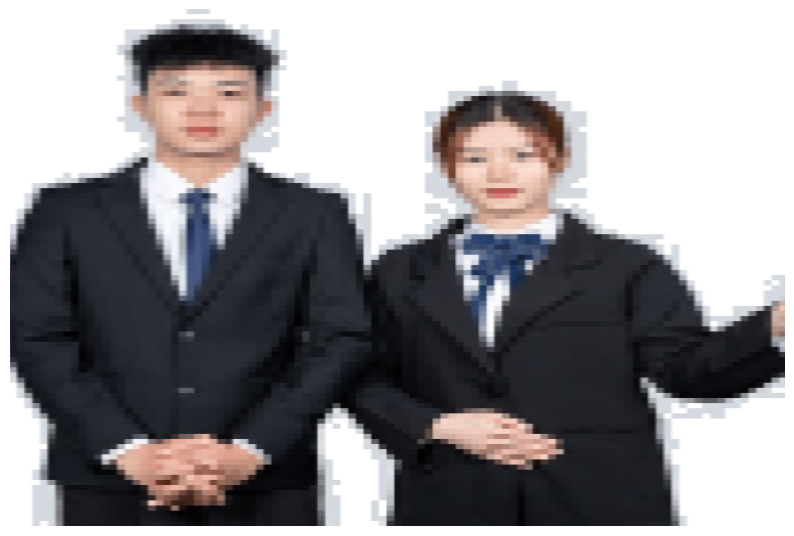

In [8]:
import cv2
import matplotlib.pyplot as plt

def widen_image_and_crop(image, factor=1.5):
    """
    将图像横向展宽并裁剪黑边
    :param image: 原始图像
    :param factor: 展宽因子，大于1表示展宽
    :return: 展宽并裁剪后的图像
    """
    height, width = image.shape[:2]

    # 展宽图像
    new_width = int(width * factor)
    resized_image = cv2.resize(image, (new_width, height))

    # 计算裁剪区域
    start_x = int((new_width - width) / 2)
    end_x = start_x + width

    # 裁剪图像
    cropped_image = resized_image[:, start_x:end_x]

    return cropped_image

# 应用扭曲并裁剪
widened_cropped_image = widen_image_and_crop(segmented_image_resized)

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(widened_cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

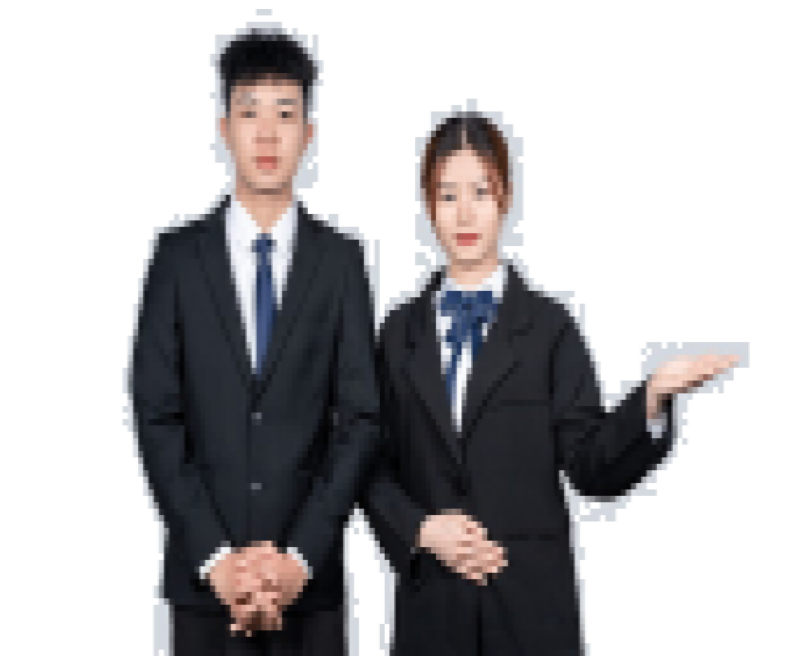

In [9]:
import cv2
import matplotlib.pyplot as plt

def widen_image_and_crop(image, factor=0.8):
    """
    将图像横向展宽并裁剪黑边
    :param image: 原始图像
    :param factor: 宽窄因子，大于1表示展宽，小于1表示缩窄
    :return: 展宽并裁剪后的图像
    """
    height, width = image.shape[:2]

    # 展宽图像
    new_width = int(width * factor)
    resized_image = cv2.resize(image, (new_width, height))

    # 计算裁剪区域
   #start_x = int((new_width - width) / 2)
   #end_x = start_x + width

    # 裁剪图像
   #cropped_image = resized_image[:, start_x:end_x]

    return resized_image

# 应用扭曲并裁剪
widened_cropped_image = widen_image_and_crop(segmented_image_resized)

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(widened_cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()